<a href="https://colab.research.google.com/github/usintec/BitcoinStockMarket/blob/master/GrangerCausalityTests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install necessary libraries (usually preinstalled in Colab)

In [1]:
!pip install --quiet statsmodels seaborn

Bitcoin price volatility Granger-causes Nigerian stock market returns.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests

In [3]:
url = 'https://raw.githubusercontent.com/usintec/BitcoinStockMarket/refs/heads/master/bitcoin_ngx_data_template_csv.csv'
df = pd.read_csv(url)

df.head()

,Date,BTC_Price,BTC_Volume,BTC_Volatility,NGX_ASI,NGX_Volatility
0,2015-01-31 00:00:00,6493.428306,2207479.262,0.060387,25287.30958,0.018721
1,2015-02-28 00:00:00,6716.899704,2885263.559,0.080655,25064.49335,0.010445
2,2015-03-31 00:00:00,8512.276780,3504987.279,0.047825,25535.33164,0.003936
3,2015-04-30 00:00:00,12058.336490,3865755.194,0.058034,25164.77632,0.022035
4,2015-05-31 00:00:00,12090.029740,1799703.593,0.063803,25390.83345,0.012436


Convert 'Date' column to datetime if it exists

In [4]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')

Keep only relevant columns

In [5]:
df = df[['Date', 'BTC_Volatility', 'NGX_Volatility']].dropna()

Plot time series

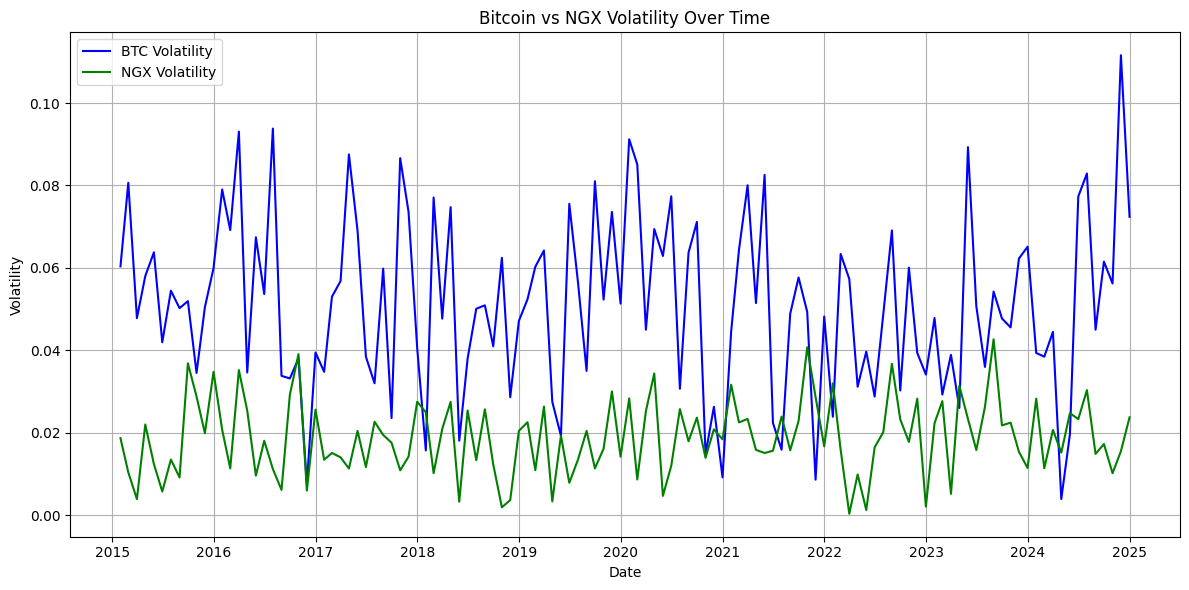

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['BTC_Volatility'], label='BTC Volatility', color='blue')
plt.plot(df['Date'], df['NGX_Volatility'], label='NGX Volatility', color='green')
plt.title('Bitcoin vs NGX Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Prepare data for Granger causality: [Y, X]

In [7]:
gc_data = df[['NGX_Volatility', 'BTC_Volatility']]

Define significance level

In [8]:
alpha = 0.05
max_lag = 4

Perform Granger Causality Test

In [9]:
print("\nRunning Granger Causality Test (H₀: BTC Volatility does NOT Granger-cause NGX Volatility)\n")

results = grangercausalitytests(gc_data, maxlag=max_lag, verbose=False)


Running Granger Causality Test (H₀: BTC Volatility does NOT Granger-cause NGX Volatility)



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Interpret results

In [10]:
for lag, test_result in results.items():
    f_test_pvalue = test_result[0]['ssr_ftest'][1]
    conclusion = "✅ Reject H₀ (Significant): BTC volatility helps predict NGX volatility." \
                 if f_test_pvalue < alpha else \
                 "❌ Fail to reject H₀ (Not significant): No evidence BTC volatility helps predict NGX volatility."

    print(f"Lag {lag}: F-test p-value = {f_test_pvalue:.4f} → {conclusion}")

Lag 1: F-test p-value = 0.2243 → ❌ Fail to reject H₀ (Not significant): No evidence BTC volatility helps predict NGX volatility.
Lag 2: F-test p-value = 0.4745 → ❌ Fail to reject H₀ (Not significant): No evidence BTC volatility helps predict NGX volatility.
Lag 3: F-test p-value = 0.5813 → ❌ Fail to reject H₀ (Not significant): No evidence BTC volatility helps predict NGX volatility.
Lag 4: F-test p-value = 0.7293 → ❌ Fail to reject H₀ (Not significant): No evidence BTC volatility helps predict NGX volatility.


Therefore, BTC volatility helps predict NGX volatility